___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
%matplotlib inline

# Ingest the data to notebook

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

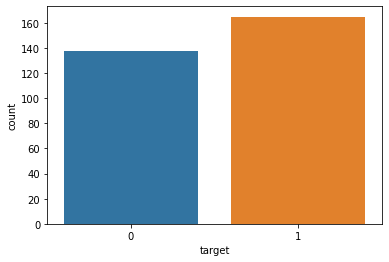

In [7]:
sns.countplot(df.target)

<AxesSubplot:xlabel='chol'>

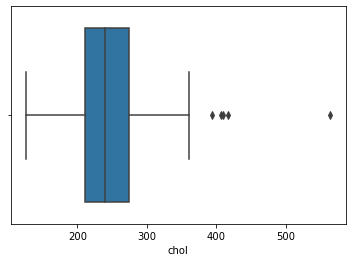

In [9]:
sns.boxplot(df.chol) ## kolestrol seviyesi

<AxesSubplot:xlabel='trestbps'>

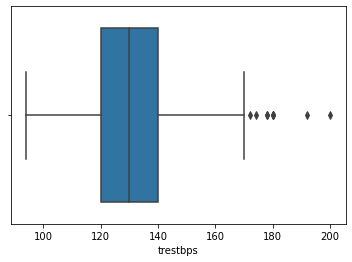

In [10]:
sns.boxplot(df.trestbps)  ## kan basıncı

<AxesSubplot:xlabel='thalach'>

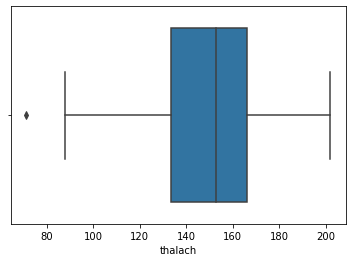

In [11]:
sns.boxplot(df.thalach) ## kalp atış hızı

<AxesSubplot:>

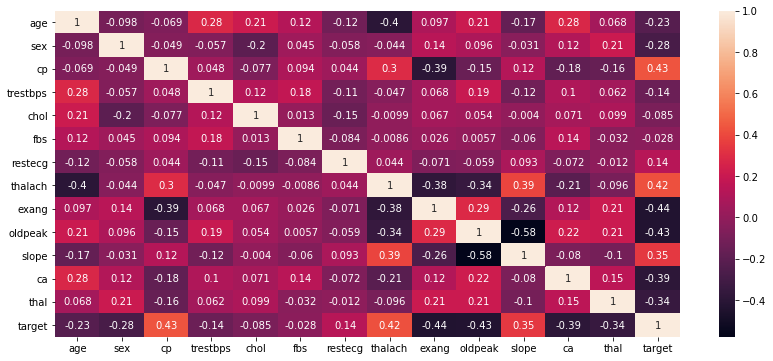

In [14]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

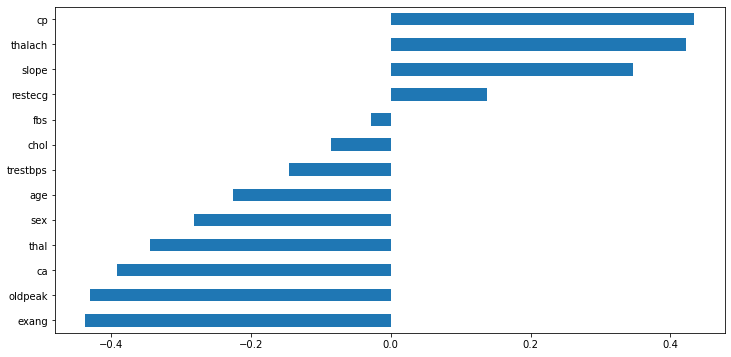

In [17]:
plt.figure(figsize=(12,6))
df.corr()["target"].drop("target").sort_values().plot.barh()

# Data Preprocessing

In [19]:
X=df.drop(["target"], axis=1)
y=df["target"]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [22]:
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
log_model=LogisticRegression()

In [61]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [62]:
y_pred=log_model.predict(X_test_scaled)

In [63]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [64]:
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [66]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[19  9]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61


Train_Set
[[ 85  25]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       110
           1       0.83      0.90      0.86       132

    accuracy                           0.84       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.84      0.84       242



## Cros Validet

In [67]:
from sklearn.model_selection import cross_validate

In [68]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.011992,0.010004,0.800000,0.857143,0.827586,0.800000
2,0.006978,0.004999,0.705882,0.857143,0.774194,0.720000
3,0.013033,0.004969,0.785714,0.846154,0.814815,0.791667
4,0.005996,0.005997,0.800000,0.923077,0.857143,0.833333
5,0.006000,0.005002,0.916667,0.846154,0.880000,0.875000
6,0.010032,0.006968,0.733333,0.846154,0.785714,0.750000
7,0.006000,0.005000,0.857143,0.923077,0.888889,0.875000
8,0.007996,0.007000,0.916667,0.846154,0.880000,0.875000
9,0.008991,0.008009,0.916667,0.846154,0.880000,0.875000
10,0.005993,0.011008,0.800000,0.923077,0.857143,0.833333


In [69]:
df_scores.mean()[2:]

test_precision    0.823207
test_recall       0.871429
test_f1           0.844548
test_accuracy     0.822833
dtype: float64

In [70]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test) ## değerler birbirine yakın çıktı.

Test_Set
[[19  9]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61


Train_Set
[[ 85  25]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       110
           1       0.83      0.90      0.86       132

    accuracy                           0.84       242
   macro avg       0.85      0.84      0.84       242
weighted avg       0.85      0.84      0.84       242



## Grid Search

In [71]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",   
                          n_jobs = -1)

In [72]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [73]:
grid_model.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}

In [74]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test) 

## recall cok arttı ama precision duştu birde test datası ile train arasında fark biraz daha açıldı gibi!!!
## f1 skoru dengeli bir şekilde arttı

Test_Set
[[18 10]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61


Train_Set
[[ 86  24]
 [ 11 121]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       110
           1       0.83      0.92      0.87       132

    accuracy                           0.86       242
   macro avg       0.86      0.85      0.85       242
weighted avg       0.86      0.86      0.85       242



## Finding Best Threshold

In [75]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

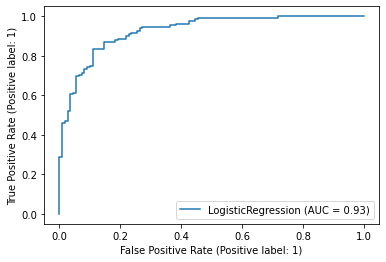

In [76]:
plot_roc_curve(log_model, X_train_scaled, y_train);

In [77]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:,1])

0.9279614325068871

In [78]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [79]:
optimal_idx = np.argmax(tp_rate - fp_rate)   ##normalde burda basic model olan (log_model kullanıp aldığım best_thresholds) 0.5 altında çıkması
optimal_threshold = thresholds[optimal_idx]  ## gerekiyor ama bunun yüksek çıkması demek, bunu uygularsak değerlerim duşecek demek!!!
optimal_threshold

0.598181635122485

In [80]:
y_pred2 = pd.Series(grid_model.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [81]:
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[19  9]
 [ 7 26]]
              precision    recall  f1-score   support

           0       0.73      0.68      0.70        28
           1       0.74      0.79      0.76        33

    accuracy                           0.74        61
   macro avg       0.74      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61



# Implement KNN and Evaluate

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [83]:
X=df.drop(["target"], axis=1)
y=df["target"]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [85]:
scaler = StandardScaler()

In [86]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## KNN Model

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [89]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [90]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [91]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [92]:
pd.DataFrame(y_pred_proba)

,0,1
0,1.0,0.0
1,0.4,0.6
2,1.0,0.0
3,0.6,0.4
4,0.4,0.6
...,...,...
56,0.4,0.6
57,0.4,0.6
58,1.0,0.0
59,0.8,0.2


In [93]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [94]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
272,0,0,0.2,0.8
179,0,0,0.0,1.0
252,0,0,0.2,0.8
160,1,1,0.6,0.4
293,0,1,0.8,0.2
264,0,0,0.0,1.0
151,1,1,0.8,0.2
217,0,0,0.0,1.0
70,1,0,0.4,0.6
166,0,0,0.0,1.0


In [95]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [96]:
confusion_matrix(y_test, y_pred)

array([[19,  9],
       [ 3, 30]], dtype=int64)

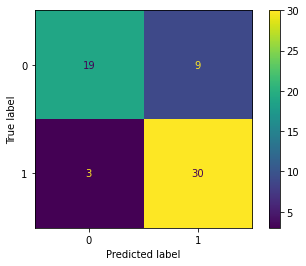

In [97]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [98]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  9]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



## K Values

In [99]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [100]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

In [101]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [102]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled,y_train)
print('WITH K=1\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=1

Test_Set

[[19  9]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        28
           1       0.75      0.82      0.78        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61


Train_Set

[[110   0]
 [  0 132]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [103]:
knn = KNeighborsClassifier(n_neighbors=22)

knn.fit(X_train_scaled,y_train)
print('WITH K=22\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=22

Test_Set

[[19  9]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61


Train_Set

[[ 81  29]
 [ 10 122]]
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       110
           1       0.81      0.92      0.86       132

    accuracy                           0.84       242
   macro avg       0.85      0.83      0.83       242
weighted avg       0.85      0.84      0.84       242



In [104]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train_scaled,y_train)
print('WITH K=9\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=9

Test_Set

[[20  8]
 [ 3 30]]
              precision    recall  f1-score   support

           0       0.87      0.71      0.78        28
           1       0.79      0.91      0.85        33

    accuracy                           0.82        61
   macro avg       0.83      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61


Train_Set

[[ 85  25]
 [  9 123]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       110
           1       0.83      0.93      0.88       132

    accuracy                           0.86       242
   macro avg       0.87      0.85      0.86       242
weighted avg       0.86      0.86      0.86       242



In [105]:
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train_scaled,y_train)
print('WITH K=16\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=16

Test_Set

[[18 10]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.90      0.64      0.75        28
           1       0.76      0.94      0.84        33

    accuracy                           0.80        61
   macro avg       0.83      0.79      0.79        61
weighted avg       0.82      0.80      0.80        61


Train_Set

[[ 86  24]
 [ 10 122]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.83       110
           1       0.84      0.92      0.88       132

    accuracy                           0.86       242
   macro avg       0.87      0.85      0.86       242
weighted avg       0.86      0.86      0.86       242



## Optimal K Value

In [110]:
from sklearn.model_selection import cross_val_score, cross_validate

In [111]:
model = KNeighborsClassifier(n_neighbors=9)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.003003,0.014001,0.840000,0.857143,0.857143,0.857143
2,0.003000,0.008995,0.600000,0.611111,0.785714,0.687500
3,0.002002,0.014008,0.791667,0.785714,0.846154,0.814815
4,0.001997,0.007998,0.833333,0.764706,1.000000,0.866667
5,0.003998,0.006997,0.916667,1.000000,0.846154,0.916667
6,0.002000,0.010999,0.791667,0.750000,0.923077,0.827586
7,0.002002,0.006999,0.875000,0.916667,0.846154,0.880000
8,0.000998,0.009003,0.916667,0.923077,0.923077,0.923077
9,0.002000,0.010000,0.875000,0.916667,0.846154,0.880000
10,0.003001,0.009995,0.791667,0.750000,0.923077,0.827586


In [115]:
df_scores.mean()[2:]

test_accuracy     0.823167
test_precision    0.827508
test_recall       0.879670
test_f1           0.848104
dtype: float64

## Gridsearch K Values

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
knn_grid = KNeighborsClassifier()

In [121]:
k_values= range(1,30)

In [122]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [123]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [124]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [125]:
knn_grid_model.best_params_

{'n_neighbors': 26, 'p': 1, 'weights': 'distance'}

In [126]:
print('WITH K=21\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=21

Test_Set

[[18 10]
 [ 1 32]]
              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61


Train_Set

[[110   0]
 [  0 132]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



## ROC Curves and AUC¶

In [127]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [128]:
knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)

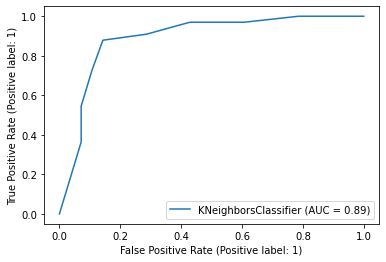

In [129]:
plot_roc_curve(knn_model, X_test_scaled, y_test)

In [130]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.8896103896103896